# Chargement et visualisation des donnees

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 

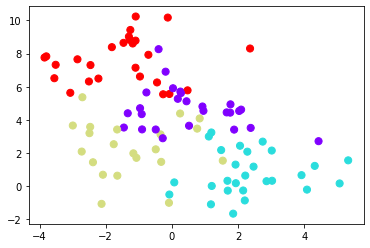

In [2]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow');
plt.show()

**Combien y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la dimension des données ?**

In [3]:
print(np.shape(X_train))
print(np.shape(X_test))

(100, 2)
(4900, 2)


100 points dans la base de train et 4900 dans la base de test avec une dimension de deux

# ARBRE DE DECISION

In [0]:


def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)



 MAX DEPTH : max depth of the decision tree.
 The depth of a tree is the maximum distance between the root and any leaf.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


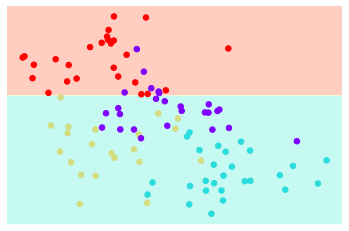

In [0]:
XXX=1
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


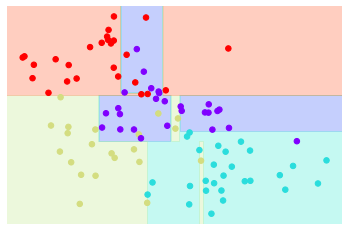

In [0]:
XXX=5
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


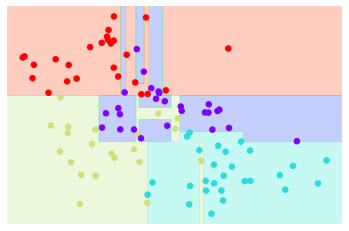

In [0]:
XXX=10
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


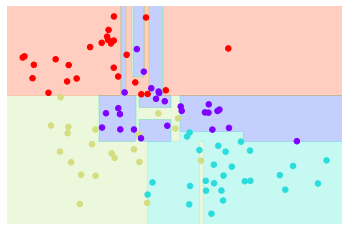

In [0]:
XXX=666
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


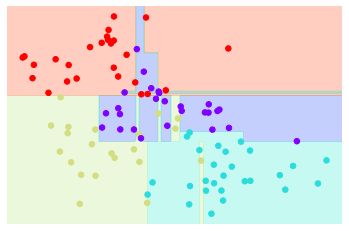

In [32]:
XXX=666
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)

Plus notre max depth augmente et plus les découpes des différentes features sont prononcées. Avec un XXX à 1, il n y a qu'une délimitation en rouge et bleu et ignore les autres couleurs... Au bout de 10, la classification semble bien marcher et au-delà il n'y a pas beaucoup de différences...
 A noter qu'en relançant un tree avec le même XXX, on ne retombe pas forméent sur le même résultat.


# Performance d'un classifieur multi-classe

In [20]:
XXX=3
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
C=metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61      1224
           1       0.81      0.80      0.80      1223
           2       0.78      0.63      0.70      1229
           3       0.88      0.58      0.70      1224

    accuracy                           0.70      4900
   macro avg       0.75      0.70      0.70      4900
weighted avg       0.75      0.70      0.70      4900



The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The **F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

On pourrait retrouver la première ligne avec la matrice de confusion puisqu'elle indique les TP FP TN FN.
Taux de reconnaissance = (TP+TN)/(TP+FP+FN+TN)

In [26]:
XXX=1
tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
C=metrics.confusion_matrix(y_test, y_pred)
print(np.shape(C))
def taux(matrix):
  return(np.sum(np.diag(matrix)))/np.sum(matrix)
print(taux(C))

(4, 4)
0.483265306122449


In [0]:
tab=[]
for XXX in range (1,21):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    tab.append(taux(C))


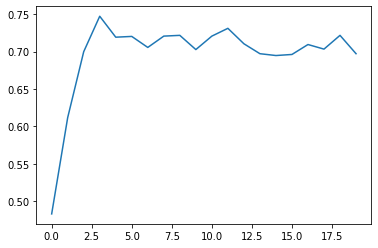

In [38]:
plt.plot(tab)

In [42]:
print(np.argmax(tab))
print(max(tab))

3
0.7471428571428571


# PARTIE 3 ARBRE DE DECISION SUR DES DONNEES DE GRANDES DIMENSIONS

on remarque qu'à 3 notre taux de reconnaissance est optimal

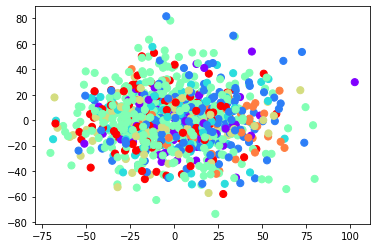

In [43]:
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow');
plt.show()

In [44]:
print(np.shape(X_train))
print(np.shape(X_test))

(966, 50)
(322, 50)


In [0]:
tab=[]
for XXX in range (1,21):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = XXX)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    tab.append(taux(C))


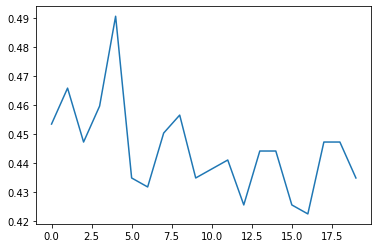

In [46]:
plt.plot(tab)

"effectivement, ça marche pas tres bien" - Mael Fayolle 11/03/2020

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1)
RF.fit(X_train, y_train)
#n_estimators nombre d arbres

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
tab=[]
for i in range (1,21):
    RF = RandomForestClassifier(criterion='entropy', n_estimators=i, random_state=1)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    tab.append(taux(C))

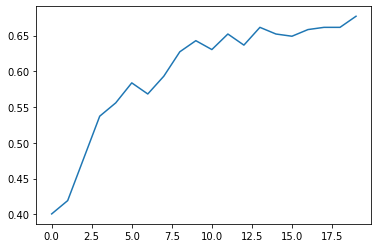

In [53]:
plt.plot(tab)

on fait varier notre nombre d'arbre de 1 à 21 et on plot notre taux de reconnaissance. OOn s'aperçoit que plus le nombre d'arbres augmentent, meilleur est le taux de reconnaissance

In [55]:
    RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1) #pr 100 arbres
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    print(taux(C))

0.7204968944099379


or le taux de reconnaissance est plus faible que celui avec notre arbre avec un maxdepth optimisé....

In [57]:
n_estimators = [x for x in range(1,300,50)] 
max_features = [x for x in np.arange(0.4,1.0,0.2)] 
max_depth = [x for x in range(1,20,5)]
grid = { "n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth }# Random search of parameters
RF = RandomForestClassifier(criterion='entropy', random_state=1)
RF_Grid = GridSearchCV(estimator = RF, param_grid = grid, cv=5)
RF_Grid.fit(X_train, y_train)# print results print(RF_Grid.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, ra

In [59]:
  y_pred = RF_Grid.predict(X_test)
  C=metrics.confusion_matrix(y_test, y_pred)

  print(taux(C))

0.7236024844720497


In [61]:

print(RF_Grid.best_params_)

{'max_depth': 11, 'max_features': 0.6000000000000001, 'n_estimators': 251}


pas 0.6 mais 0.4

In [62]:
    RF = RandomForestClassifier(criterion='entropy', n_estimators=251, random_state=1,max_features=0.4,max_depth=11) #pr 100 arbres
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    print(taux(C))

0.7422360248447205


In [63]:
    RF = RandomForestClassifier(criterion='entropy', n_estimators=251, random_state=1,max_features=0.6,max_depth=11) #pr 100 arbres
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    C=metrics.confusion_matrix(y_test, y_pred)
    print(taux(C))

0.7236024844720497
